**Expérience Libre**
https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./Data/housepricedata.csv')

In [4]:
df

LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0        8450            7            5          856         2         1   
1        9600            6            8         1262         2         0   
2       11250            7            5          920         2         1   
3        9550            7            5          756         1         0   
4       14260            8            5         1145         2         1   
...       ...          ...          ...          ...       ...       ...   
1455     7917            6            5          953         2         1   
1456    13175            6            6         1542         2         0   
1457     9042            7            9         1152         2         0   
1458     9717            5            6         1078         1         0   
1459     9937            5            6         1256         1         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0                3             8           0         548                 1  
1                3             6           1         460                 1  
2                3             6           1         608                 1  
3                3             7           1         642                 0  
4                4             9           1         836                 1  
...            ...           ...         ...         ...               ...  
1455             3             7           1         460                 1  
1456             3             7           2         500                 1  
1457             4             9           2         252                 1  
1458             2             5           0         240                 0  
1459             3             6           0         276                 0  

[1460 rows x 11 columns]

In [5]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [16]:
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

**On a donc 6 variables pour nos ensembles de données :**
* x_train (10 entités en entrée, 70 % du jeu de données complet)
* x_val (10 entités en entrée, 15 % de l'ensemble de données complet)
* x_test (10 entités en entrée, 15 % de l'ensemble de données complet)
* y_train (1 label, 70 % de l'ensemble de données complet)
* y_val (1 label, 15 % de l'ensemble de données complet)
* y_test (1 label, 15 % de l'ensemble de données complet)

In [17]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


**Jusque là nous avons :**
* Lisez le fichier CSV (valeurs séparées par des virgules) et convertissez-les en tableaux.
* Divisez notre ensemble de données en entités d'entrée et en étiquette.
* Mettez les données à l'échelle afin que les entités en entrée aient des ordres de grandeur similaires.
* Divisez notre jeu de données en jeu de formation, jeu de validation et jeu de test.

In [24]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

**Création du réseau de neuronnes**

https://cdn-media-1.freecodecamp.org/images/H3eAYjXcA2asaCjCYrVT7lc2IIBQGQWzQlPG

In [25]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [26]:
model.compile(optimizer='sgd',
loss='binary_crossentropy',
metrics=['accuracy'])

In [27]:
hist = model.fit(x_train, y_train,
batch_size=32, epochs=100,
validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.6885 - accuracy: 0.5127 - val_loss: 0.6752 - val_accuracy: 0.5708
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5646 - val_loss: 0.6613 - val_accuracy: 0.6256
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.6517 - val_loss: 0.6470 - val_accuracy: 0.7352
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.7260 - val_loss: 0.6340 - val_accuracy: 0.7808
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.7671 - val_loss: 0.6229 - val_accuracy: 0.8082
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7945 - val_loss: 0.6127 - val_accuracy: 0.8311
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.7984 - val_loss: 0.6028 - val_accuracy: 0.8539
Epoch 8/100
3

**Au dessus entrainement du modèle**
* on voit que le loss diminue au fur et à mesure
* et que la précision augmente

In [28]:
model.evaluate(x_test, y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.8904


0.8904109597206116

**En résumé**
* Nous spécifions l'architecture avec le modèle Keras Sequential.
* Nous spécifions certains de nos paramètres (optimiseur, fonction de perte, métriques à suivre) avec model.compile
* Nous formons notre modèle (trouver les meilleurs paramètres pour notre architecture) avec les données de formation avec model.fit
* Nous évaluons notre modèle sur le jeu de test avec model.evaluate

In [29]:
import matplotlib.pyplot as plt

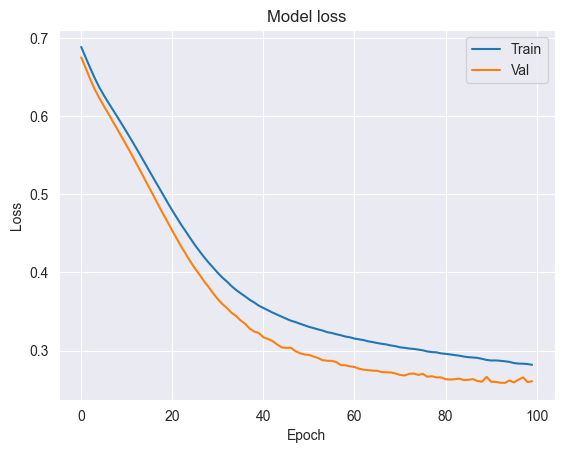

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

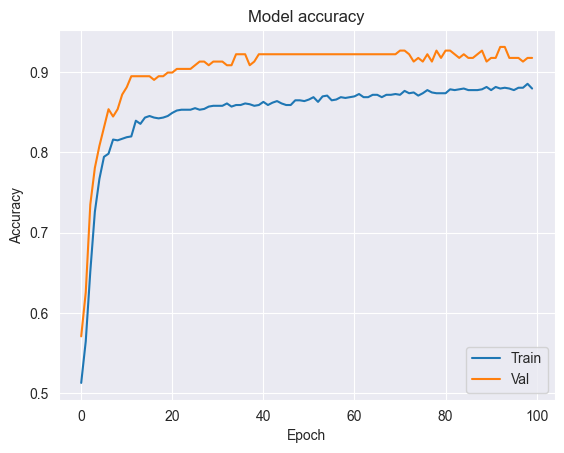

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Ajout de la régularisation au réseau de neurones**
elle va sur-adapter d'une mauvaise façon notre ensemble d'entrainement

In [35]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

hist_2 = model_2.fit(x_train, y_train,
batch_size=32, epochs=100,
validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 4s 67ms/step - loss: 0.4976 - accuracy: 0.7554 - val_loss: 0.3640 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 2s 63ms/step - loss: 0.3638 - accuracy: 0.8562 - val_loss: 0.2929 - val_accuracy: 0.8995
Epoch 3/100
32/32 [==============================] - 2s 62ms/step - loss: 0.3495 - accuracy: 0.8532 - val_loss: 0.4670 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 2s 70ms/step - loss: 0.3365 - accuracy: 0.8571 - val_loss: 0.2906 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 2s 64ms/step - loss: 0.3017 - accuracy: 0.8767 - val_loss: 0.3655 - val_accuracy: 0.8265
Epoch 6/100
32/32 [==============================] - 2s 69ms/step - loss: 0.3027 - accuracy: 0.8757 - val_loss: 0.2865 - val_accuracy: 0.9132
Epoch 7/100
32/32 [==============================] - 2s 66ms/step - loss: 0.2721 - accuracy: 0.8865 - val_loss: 0.3178 - val_accuracy: 0.8995
Epoch 

In [36]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

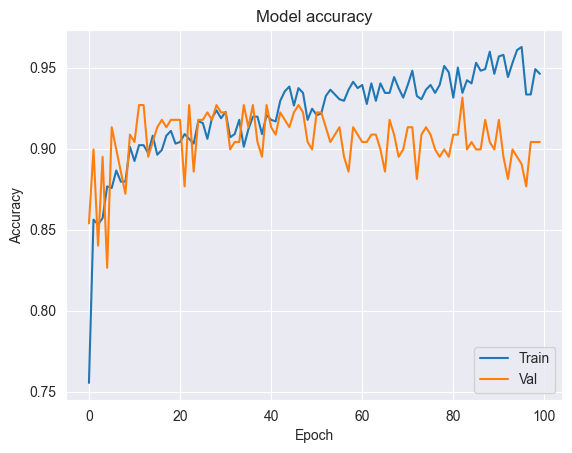

In [37]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [38]:
from keras.layers import Dropout
from keras import regularizers

**Le but est de réduire le surajustement**

In [39]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [41]:
model_3.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

hist_3 = model_3.fit(x_train, y_train,
batch_size=32, epochs=100,
validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 4s 78ms/step - loss: 14.2384 - accuracy: 0.6566 - val_loss: 3.8750 - val_accuracy: 0.7443
Epoch 2/100
32/32 [==============================] - 3s 82ms/step - loss: 1.6733 - accuracy: 0.8249 - val_loss: 0.6177 - val_accuracy: 0.9041
Epoch 3/100
32/32 [==============================] - 2s 75ms/step - loss: 0.6031 - accuracy: 0.8327 - val_loss: 0.5303 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 2s 77ms/step - loss: 0.5400 - accuracy: 0.8444 - val_loss: 0.4809 - val_accuracy: 0.9087
Epoch 5/100
32/32 [==============================] - 3s 80ms/step - loss: 0.4948 - accuracy: 0.8659 - val_loss: 0.5137 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 3s 79ms/step - loss: 0.5061 - accuracy: 0.8601 - val_loss: 0.4345 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 2s 78ms/step - loss: 0.4928 - accuracy: 0.8679 - val_loss: 0.4300 - val_accuracy: 0.8995
Epoch

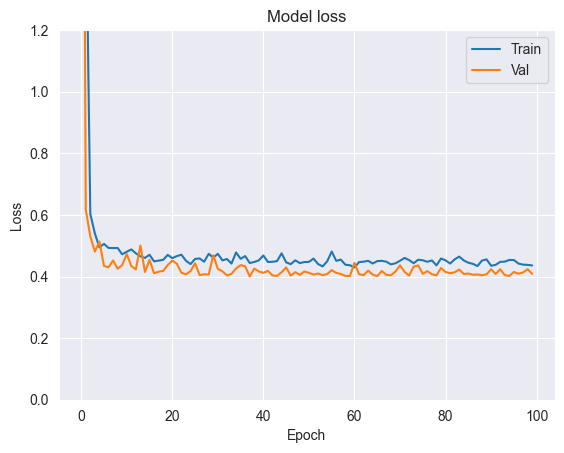

In [42]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

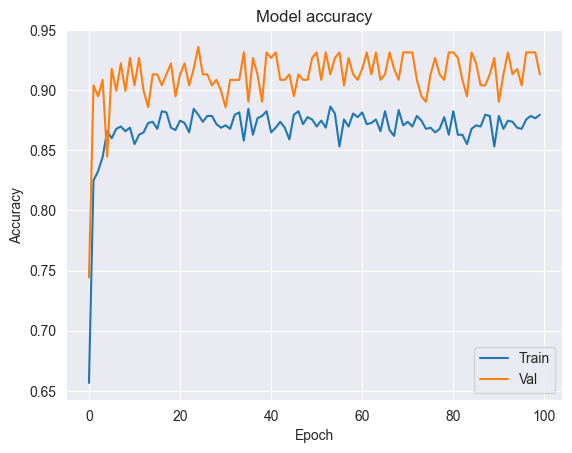

In [43]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()